### Importing libraries

In [1]:
import string
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the essay

In [3]:
text=open("read.txt", encoding="utf-8").read()

### Cleaning the text

In [4]:
lower=text.lower()
cleaned_text=lower.translate(str.maketrans("","",string.punctuation))
tokenized_words = word_tokenize(cleaned_text, "english")

In [5]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words("english"):
        final_words.append(word)

### Creating Final List of words

In [6]:
lemma_words=[]
for word in final_words:
    word=WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

### Creating the emotion list
A list containing all the emotions from the text

In [7]:
emotion_list=[]

with open("emotions.txt","r") as file:
    for line in file:
        clean=line.replace("\n","").replace("'","").replace(",","").strip()
        word,emotion= clean.split(":")
        
        if word in final_words:
            emotion_list.append(emotion)
            
print(emotion_list)

[' attached', ' sad', ' average', ' adequate', ' happy', ' loved', ' sad']


### Taking into account the number of times an emotion occurs in the text

In [8]:
w= Counter(emotion_list)
print(w)

Counter({' sad': 2, ' attached': 1, ' average': 1, ' adequate': 1, ' happy': 1, ' loved': 1})


### Plotting the emotions on the graph

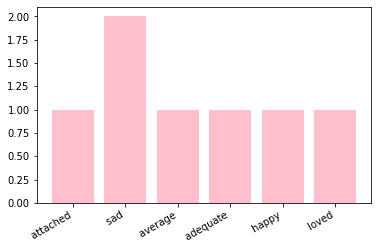

In [9]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values(), color="pink")
fig.autofmt_xdate()
plt.savefig('graph_nltk.png')
plt.show()

### Creating a function to anlayze the sentiments

In [10]:
def sentiment_analyze(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

In [12]:
sentiment_analyze(cleaned_text)

{'neg': 0.082, 'neu': 0.773, 'pos': 0.145, 'compound': 0.9707}
Positive Sentiment


### Finding the polarity and subjectivity of the text

In [13]:
from textblob import TextBlob
blob=TextBlob(cleaned_text)
print(blob.sentiment)

Sentiment(polarity=0.18590146750524109, subjectivity=0.5779874213836477)
